In [3]:
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy
from qiskit.tools.visualization import plot_histogram


C:\Users\xavie\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqprovider.py:272: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


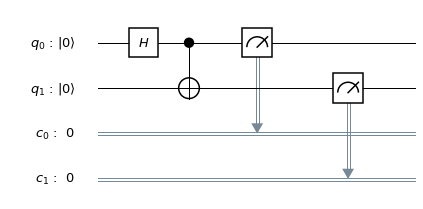

In [4]:
# Loading your IBM Q account(s)
IBMQ.load_accounts()

# Define a two-qubit quantum circuit
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q, c)

# Apply the quantum gates
circuit.h(q[0])
circuit.cx(q[0], q[1])

# Finish off with the measurements
circuit.measure(q, c)

# Draw the circuit
circuit.draw(output="mpl")


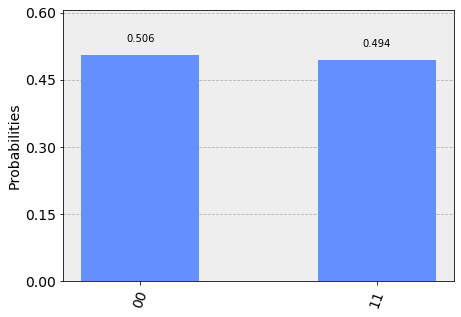

In [5]:
# First, simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()

# Then, plot a histogram of the results
counts = result.get_counts(circuit)
plot_histogram(counts)


Job Status: job has successfully run


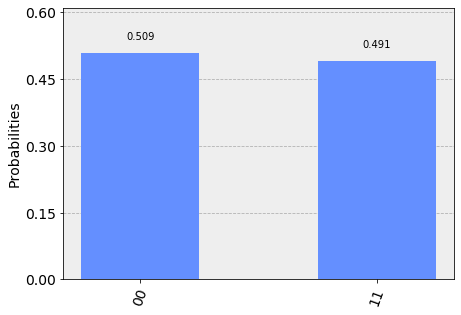

In [6]:
# Next, find the least-busy IBM device
lb_device = least_busy(IBMQ.backends())

# And run the circuit on that device
job = execute(circuit, backend=lb_device, shots=1024)
job_monitor(job)
result = job.result()

# Finally, plot a histogram of the results
counts = result.get_counts(circuit)
plot_histogram(counts)